In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print("no of persons travelled in original data:"+str(len(titanic.index)))

no of persons travelled in original data:418


## 2.Data Analysing

<AxesSubplot:xlabel='Survived', ylabel='count'>

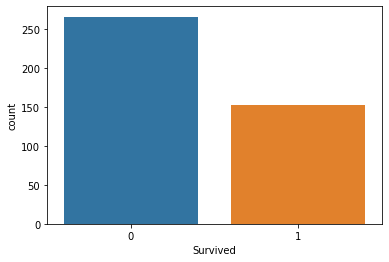

In [4]:
sns.countplot(x="Survived", data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

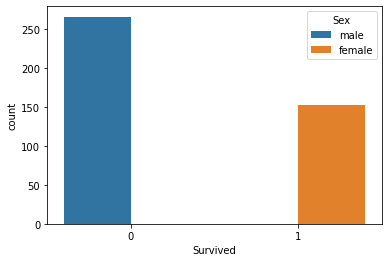

In [5]:
sns.countplot(x="Survived",hue="Sex", data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

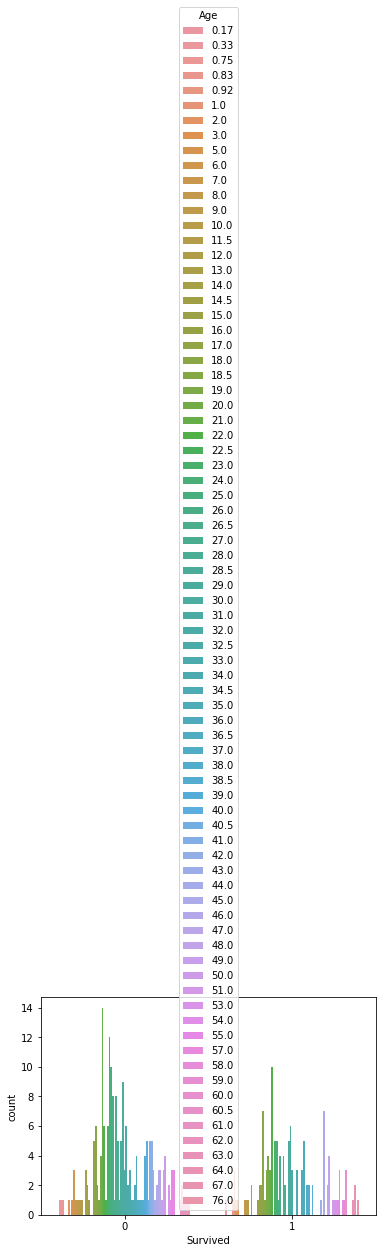

In [6]:
sns.countplot(x="Survived",hue="Age", data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

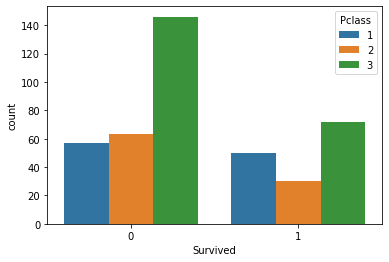

In [7]:
sns.countplot(x="Survived",hue="Pclass", data=titanic)

<AxesSubplot:ylabel='Frequency'>

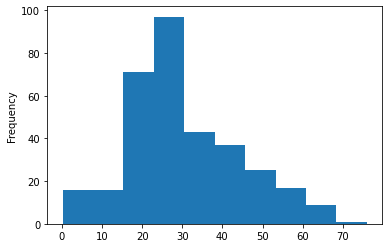

In [8]:
titanic["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

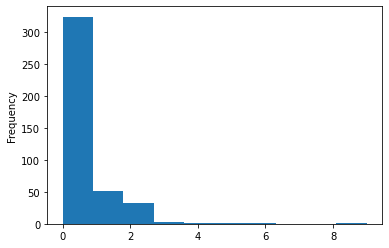

In [9]:
titanic["Parch"].plot.hist() 

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

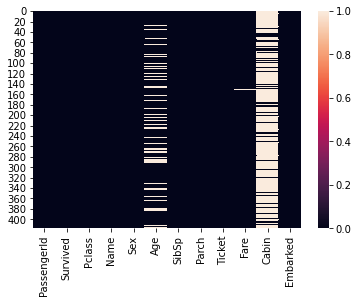

In [11]:
sns.heatmap(titanic.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

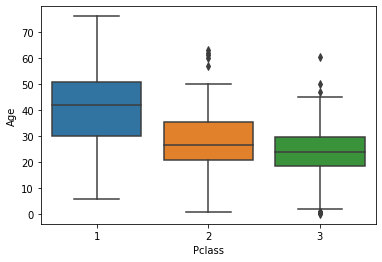

In [12]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [13]:
titanic.drop(['Cabin','Age'],axis=1,inplace=True)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


In [15]:
titanic.dropna(inplace=True)

<AxesSubplot:>

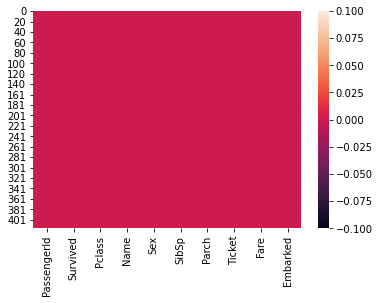

In [16]:
sns.heatmap(titanic.isnull())

In [17]:
Sex = pd.get_dummies(titanic['Sex'],drop_first=True)
Sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [18]:
embark= pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [19]:
pcl = pd.get_dummies(titanic['Pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [20]:
titanic=pd.concat([titanic,Sex,embark,pcl],axis=1)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,0,0,1,0,1


In [21]:
titanic.drop(['PassengerId','Name','Embarked','Pclass','Sex','Fare','Ticket'],axis=1,inplace=True)


In [22]:
titanic.head()

,Survived,SibSp,Parch,male,Q,S,2,3
0,0,0,0,1,1,0,0,1
1,1,1,0,0,0,1,0,1
2,0,0,0,1,1,0,1,0
3,0,0,0,1,0,1,0,1
4,1,1,1,0,0,1,0,1


In [23]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

1.0